In [ ]:
import pandas as pd # used for data manipulations
import matplotlib.pyplot as plt    # used for plotting
from sklearn import datasets
import numpy as np     # used for numerical calculations

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split


#import the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre-processing
from sklearn import preprocessing

In [ ]:
#import the datasets

df = pd.read_csv("/content/Hotel Reservations.csv")

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
# use label encoder to convert into numbers

label_encoder = preprocessing.LabelEncoder()
df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['avg_price_per_room'] = label_encoder.fit_transform(df['avg_price_per_room'])



In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,343,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,1912,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,238,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,1645,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,1435,0,0


In [ ]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [ ]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,343,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,1912,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,238,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,1645,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,1435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,3403,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,1291,2
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,1589,2
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,1435,0


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [ ]:
# Splitting the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29020, 17), (7255, 17), (29020,), (7255,))

In [ ]:
## Building Decision Tree Classifier using Entropy as a Criterion#

In [ ]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth =5)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
##PLot the decsion Tree#

[Text(0.5491071428571429, 0.9166666666666666, 'x[7] <= 151.5\nentropy = 0.911\nsamples = 29020\nvalue = [9469, 19551]'),
 Text(0.2857142857142857, 0.75, 'x[16] <= 0.5\nentropy = 0.779\nsamples = 23294\nvalue = [5367, 17927]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[11] <= 3.5\nentropy = 0.916\nsamples = 12134\nvalue = [4023, 8111]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[7] <= 90.5\nentropy = 0.593\nsamples = 6172\nvalue = [886, 5286]'),
 Text(0.03571428571428571, 0.25, 'x[2] <= 0.5\nentropy = 0.417\nsamples = 4790\nvalue = [404, 4386]'),
 Text(0.017857142857142856, 0.08333333333333333, 'entropy = 0.242\nsamples = 2848\nvalue = [114, 2734]'),
 Text(0.05357142857142857, 0.08333333333333333, 'entropy = 0.608\nsamples = 1942\nvalue = [290, 1652]'),
 Text(0.10714285714285714, 0.25, 'x[7] <= 116.5\nentropy = 0.933\nsamples = 1382\nvalue = [482, 900]'),
 Text(0.08928571428571429, 0.08333333333333333, 'entropy = 0.998\nsamples = 796\nvalue = [375, 421]'),
 Text(0.125, 0

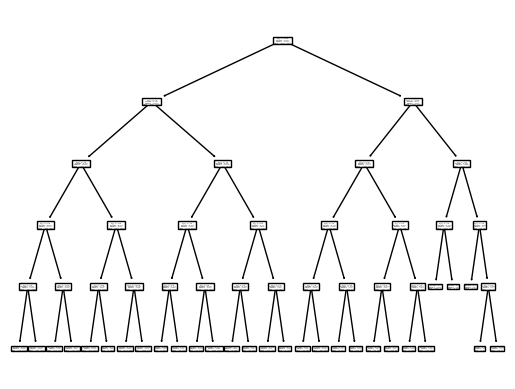

In [ ]:
tree.plot_tree(model)

In [ ]:
##Prediction on the Test data##

In [ ]:
preds = model.predict(x_test)

In [ ]:
pd.Series(preds).value_counts()

1    5094
0    2161
dtype: int64

In [ ]:
y_test

4968     1
34540    1
36108    1
1553     0
24974    1
        ..
35781    0
12257    1
27212    1
28097    1
6556     1
Name: booking_status, Length: 7255, dtype: int64

In [ ]:
#Crosstab : Way to understand the two way table between predicted vs actual#

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
booking_status,,
0,1675,741
1,486,4353


In [ ]:
#Accuracy of the above model#

In [ ]:
np.mean(preds==y_test)

0.8308752584424535